# Heart Failure Predictor

## Introduction

Purpose of this project is to create a model to predict for heart outcomes using 11 clinical features provided by the Kaggle dataset found using the following link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/

Different supervised learning models will be used and compared to see which model is most suitable for the data. 

## Attribute Information (provided in dataset)

   - Age: age of the patient [years]
   - Sex: sex of the patient [M: Male, F: Female]
   - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
   - RestingBP: resting blood pressure [mm Hg]
   - Cholesterol: serum cholesterol [mm/dl]
   - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]    
   - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
   - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
   - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
   - Oldpeak: oldpeak = ST [Numeric value measured in depression] 
   - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
   - HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset 

data = pd.read_csv("heart.csv")

In [3]:
# preview dataset

data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
# dataset size

data.shape

(918, 12)

In [5]:
# null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Look for duplicated values
data.duplicated().sum()

0

In [7]:
# Descriptive information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Descriptive statistics
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Findings:
- 6 numerical variables 
- There may be outliers present as the max for the columns such as Age, RestingBP, FastingBS, MaxHR, and Oldpeak exceed the 3rd percentile.
- Large spread of data present in dataset

Data To Clean
- 6 categorical variables to convert into numerical categories

For futher analysis, we can look at histograms to see distributions.

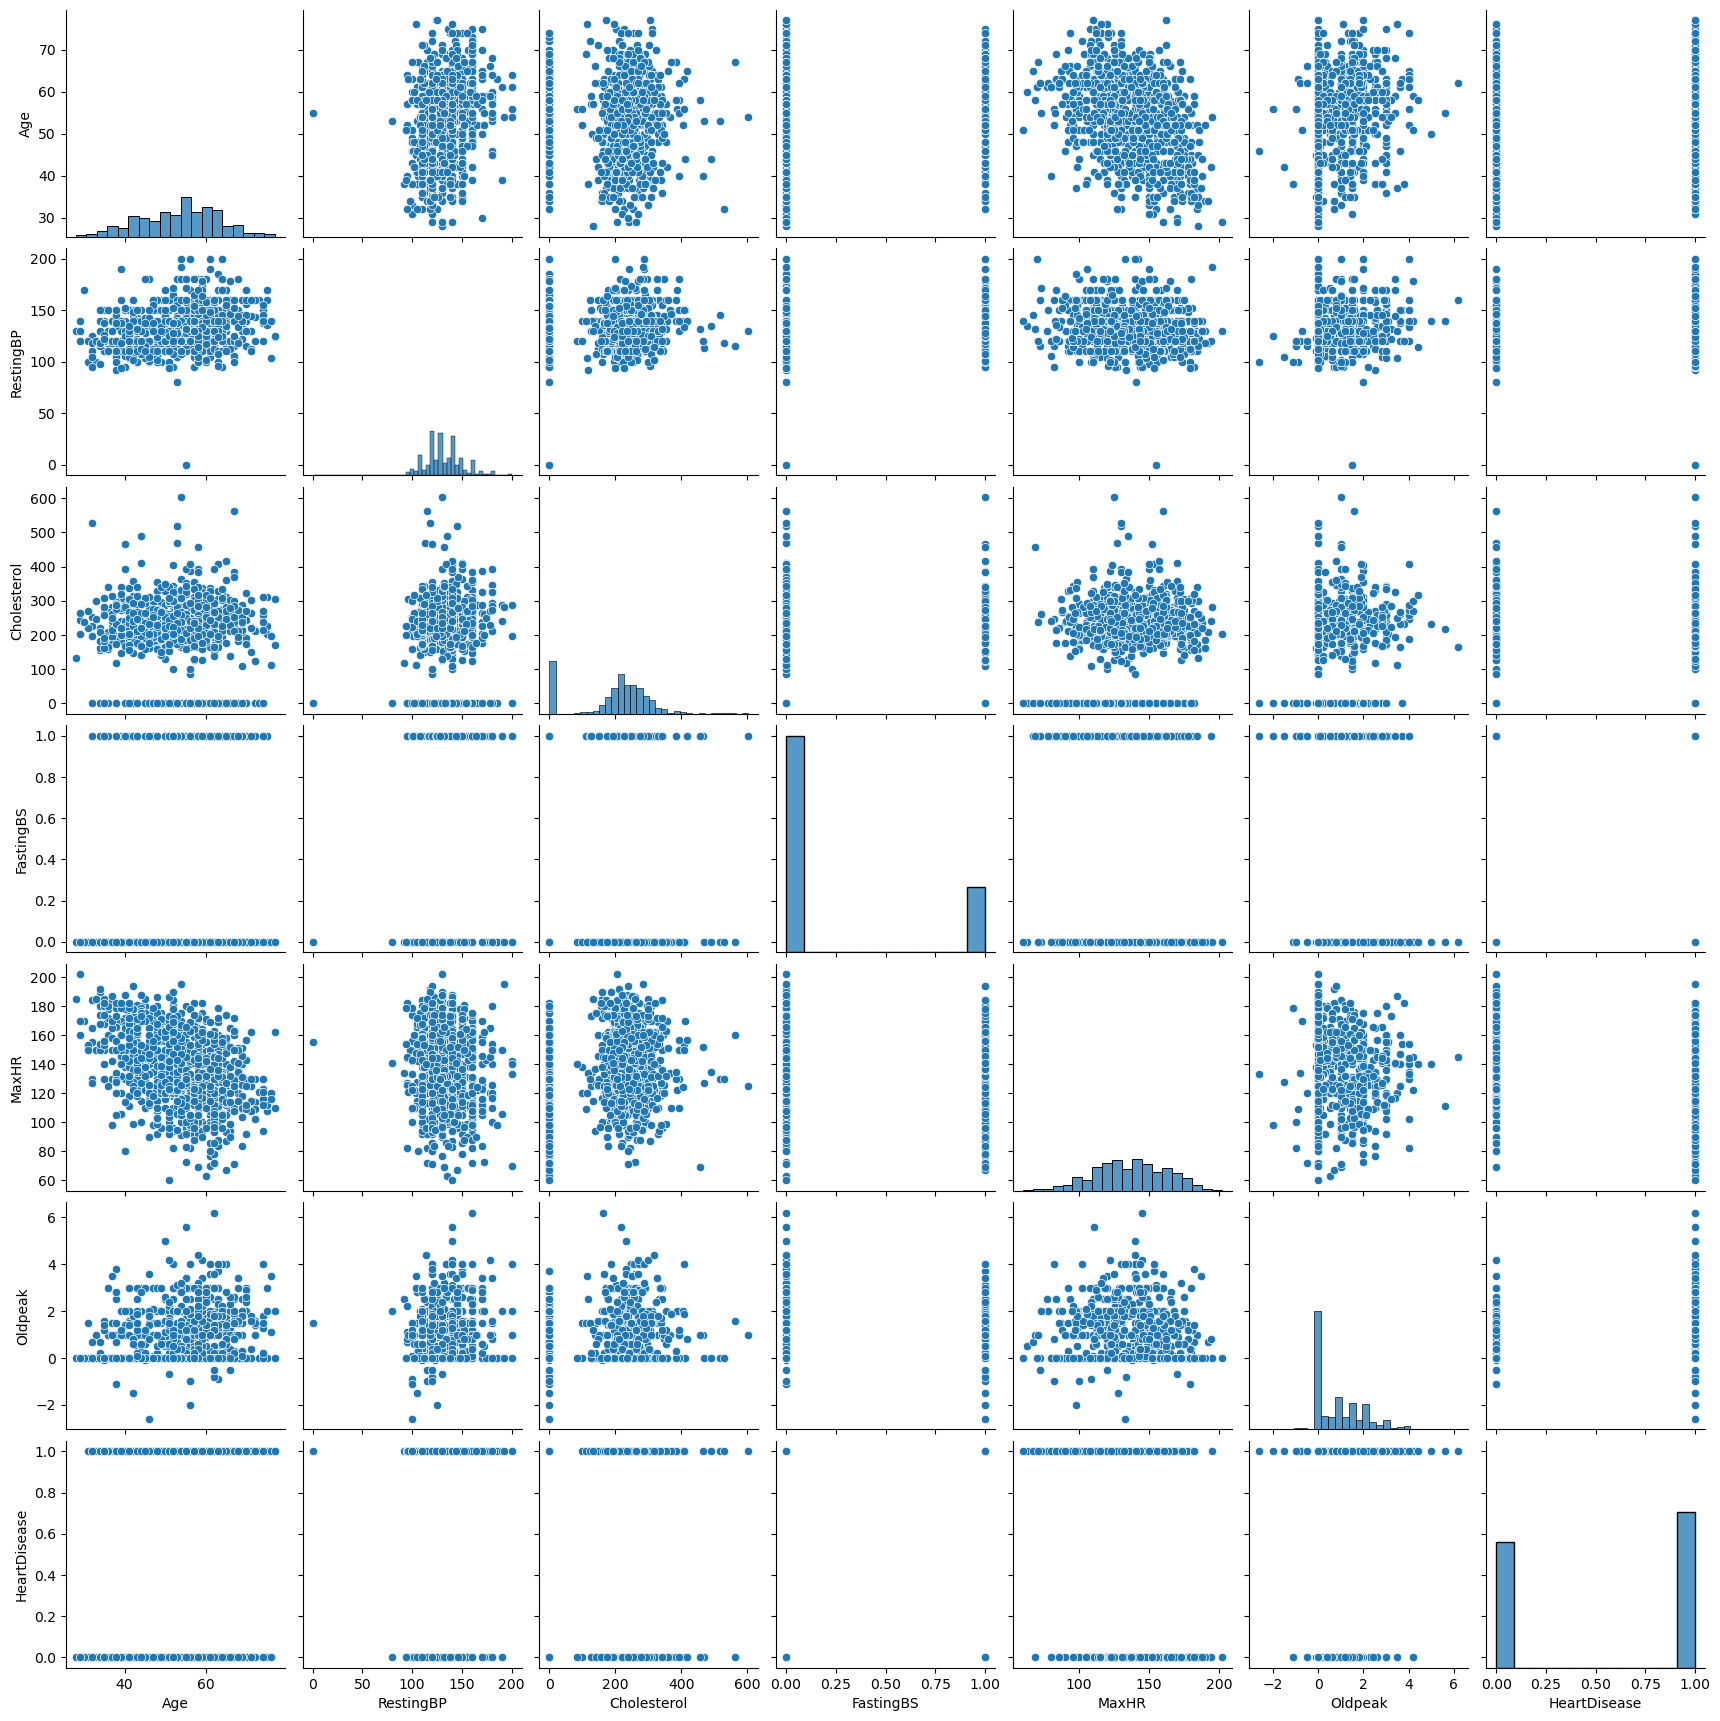

In [9]:
# Visualize all variables and relationship to each other.
print(sns.pairplot(data))

Pairplot Findings:

    The histograms of columns Age- uniformly distributed, --- Resting BP
    From the scatter plot it does not look like there is any obvious correlations between variables. 

Let's isolate the histograms and look more closely


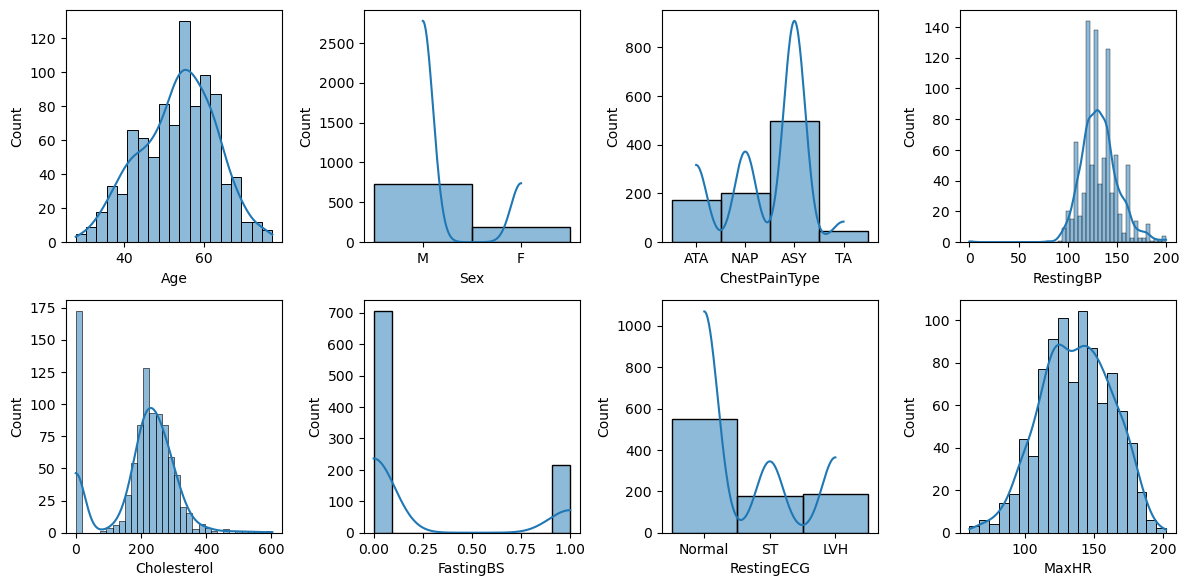

In [10]:
# Histogram distribution of whole dataset
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns[:]):
    if i <= 7:
        plt.subplot(2, 4, i + 1)
        sns.histplot(data[column], kde=True)
        plt.title = f"Distribution of {column}"
plt.tight_layout()
plt.show()

Histogram Findings:
- Age, RestingBP, MaxHR suggest a unimodel distribution
- Cholesterol suguests a bimodal distribution with a distinct peak that is heavily towards 0, may be errogenous measurements. 
- FastinG BS is bimodal with 2 distinct populations, one heavily towards 0 the other towards 1.
- Sex, ChestPainType, Resting ECG are categorical values with distinct peaks for each category within that column

In [11]:
#Drop categorical columns
data.drop(columns=['ChestPainType', 'RestingECG','Sex'])

Age  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  Oldpeak  \
0     40        140          289          0    172              N      0.0   
1     49        160          180          0    156              N      1.0   
2     37        130          283          0     98              N      0.0   
3     48        138          214          0    108              Y      1.5   
4     54        150          195          0    122              N      0.0   
..   ...        ...          ...        ...    ...            ...      ...   
913   45        110          264          0    132              N      1.2   
914   68        144          193          1    141              N      3.4   
915   57        130          131          0    115              Y      1.2   
916   57        130          236          0    174              N      0.0   
917   38        138          175          0    173              N      0.0   

    ST_Slope  HeartDisease  
0         Up             0  
1       Flat             1  
2         Up             0  
3       Flat             1  
4         Up             0  
..       ...           ...  
913     Flat             1  
914     Flat             1  
915     Flat             1  
916     Flat             1  
917       Up             0  

[918 rows x 9 columns]

# Outlier Analysis

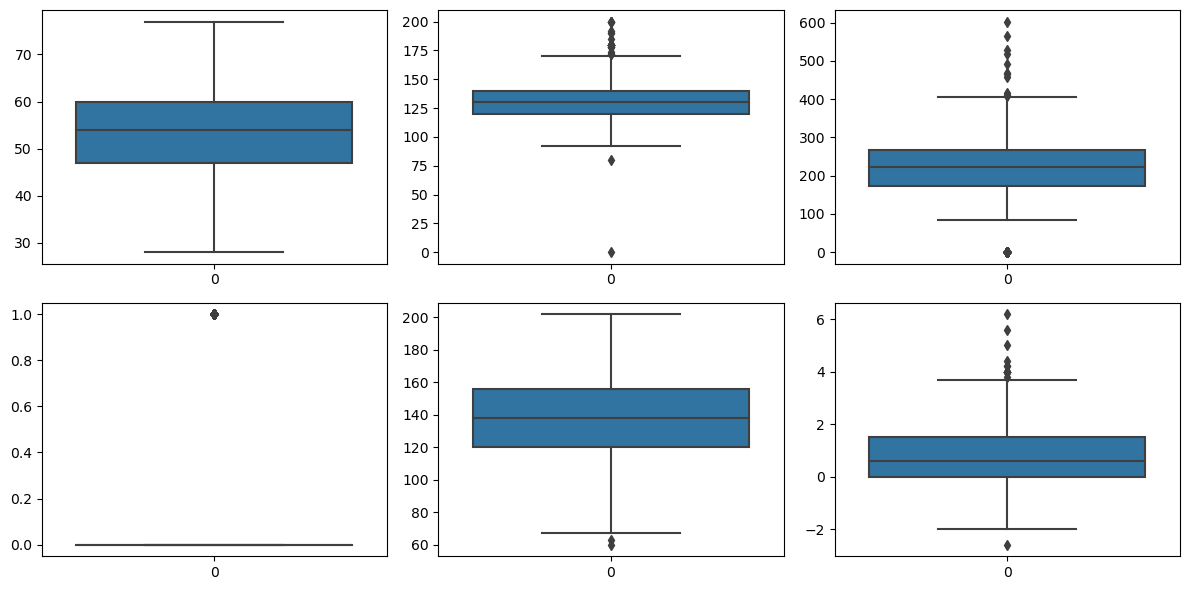

In [12]:
# Isolate numerical columns to do outlier analysis
numerical = data.drop(columns=['ChestPainType', 'RestingECG', 'Sex','ExerciseAngina', 'ST_Slope', 'HeartDisease'])

# Boxplot distribution of whole dataset
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical.columns[:]):
    if i <= 7:
        plt.subplot(2, 3, i + 1)
        sns.boxplot(numerical[column])
        plt.title = f"Distribution of {column}"
plt.tight_layout()
plt.show()

<Axes: >

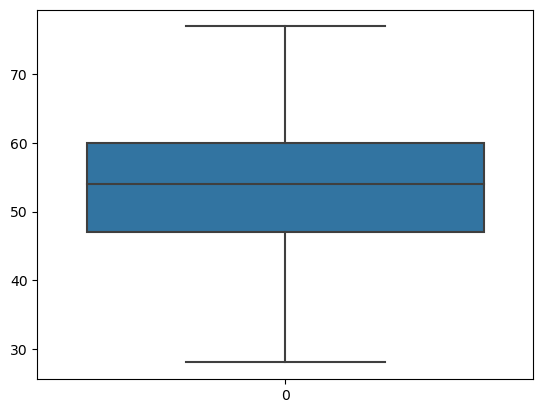

In [13]:
# A few outliers identified. Isolate each boxplot to analysis outliers more thoroughly.

sns.boxplot(data['Age'])

# No outliers in Age

In [14]:
numerical

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0     40        140          289          0    172      0.0
1     49        160          180          0    156      1.0
2     37        130          283          0     98      0.0
3     48        138          214          0    108      1.5
4     54        150          195          0    122      0.0
..   ...        ...          ...        ...    ...      ...
913   45        110          264          0    132      1.2
914   68        144          193          1    141      3.4
915   57        130          131          0    115      1.2
916   57        130          236          0    174      0.0
917   38        138          175          0    173      0.0

[918 rows x 6 columns]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

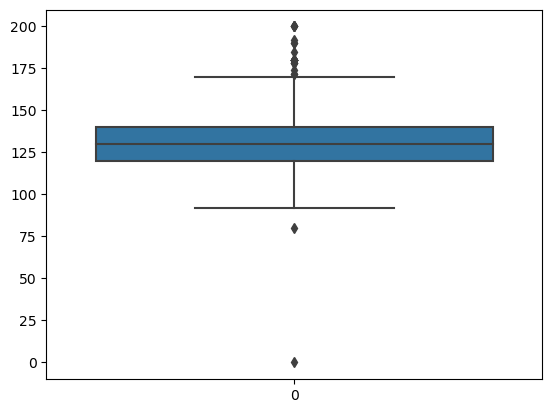

In [15]:
sns.boxplot(data['RestingBP'])
# Patients can be hypertensive with resting BP ~200mm Hg. Should be kept in the dataset

# Look at outlier than is <25
data.loc[data['RestingBP'] <25]

In [16]:
# Physiologically cannot have RestingBP, Cholesterol, and FastingBS as 0. Remove outlier.
clean_data = data.drop(data[data['RestingBP']<25].index)

199.0163576881134

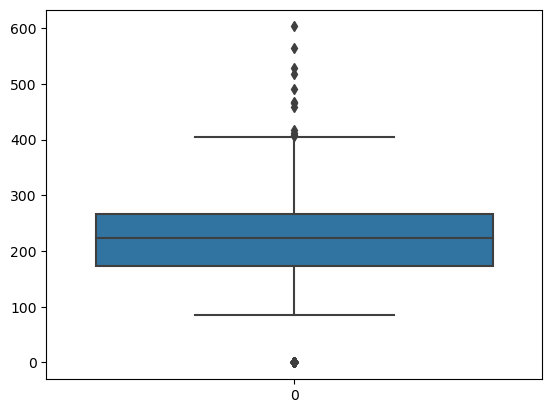

In [17]:
sns.boxplot(clean_data['Cholesterol'])

#As from the following source https://www.elo.health/biomarkers/total-cholesterol-overview/500/  Cholesterol above 240 mg/dL is considered hyperlipemic. 
#Patients can present with 600 mg/dL. Should be kept in the dataset.  

# Cholesterol cannot be 0. Isolate Cholestol <25
clean_data.loc[clean_data['Cholesterol'] <25]
# 171 columns where cholesterol is 0. The cholesterol column is normally distributed. Perform Mean imputation to replace 0s with the mean

# Find median
clean_data['Cholesterol'].mean()

In [18]:
#Replace Blood Pressure with median values using median imputation
clean_data['Cholesterol'] = np.where((clean_data['Cholesterol'] <25), 199, clean_data['Cholesterol'])

<Axes: >

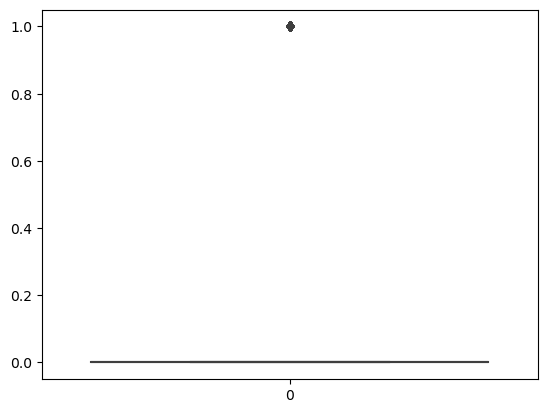

In [19]:
sns.boxplot(clean_data['FastingBS'])

# As per dataset description 1: if FastingBS > 120 mg/dl, 0: otherwise. 

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
370   60   M           ASY        135          199          0     Normal   
390   51   M           ASY        140          199          0     Normal   
402   65   M           ASY        145          199          1         ST   
496   58   M           ASY        132          458          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
370     63              Y      0.5       Up             1  
390     60              N      0.0     Flat             1  
402     67              N      0.7     Flat             1  
496     69              N      1.0     Down             0

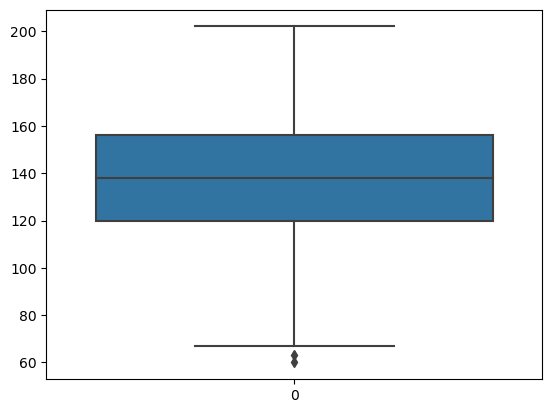

In [20]:
sns.boxplot(clean_data['MaxHR'])

# Isolate MaxHR <70
clean_data.loc[clean_data['MaxHR'] <70]
# MaxHR are still within acceptable range for patients. Low MaxHR suggests the patient may have heart disease.

<Axes: >

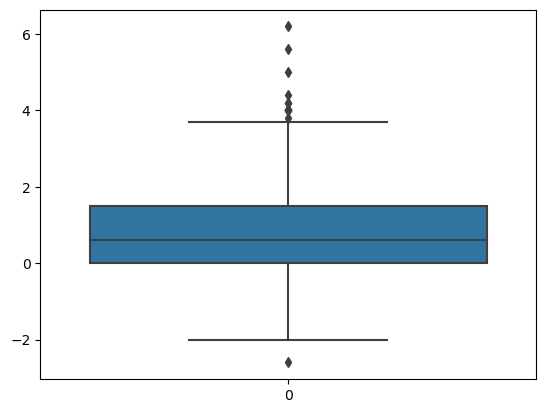

In [21]:
sns.boxplot(clean_data['Oldpeak'])

#Keep variation in dataset. 

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_8440\3957152076.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_data.corr(), annot = True)


<Axes: >

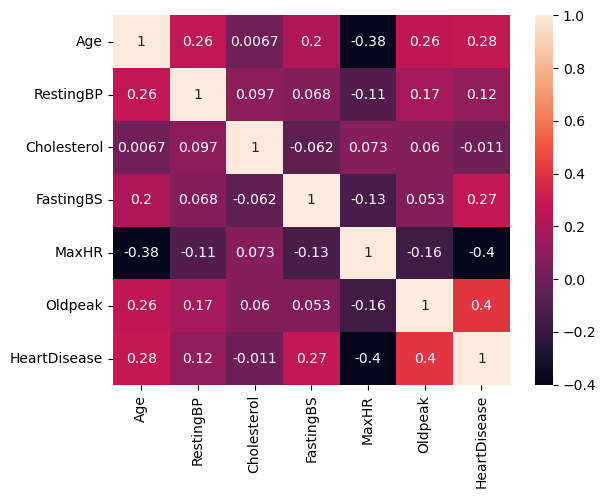

In [22]:
# Check for correlations
sns.heatmap(clean_data.corr(), annot = True)

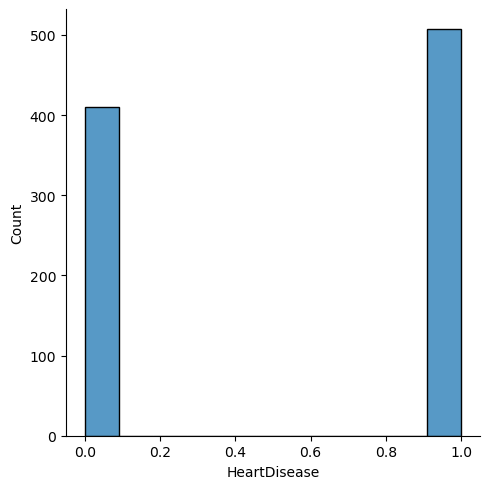

In [23]:
#Compare number of outcomes to each other. Is it balanced?

sns.displot(clean_data['HeartDisease'])

- More individuals with heart disease (count of ~500) than those without (~400).
- Fairly equal representation of both outcomes within dataset. 

In [24]:
# Convert categorical variables in numerical
categorical_dummies = pd.get_dummies(data[['ChestPainType', 'RestingECG', 'Sex','ExerciseAngina', 'ST_Slope']])
categorical_dummies

ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0                    0                  1                  0   
1                    0                  0                  1   
2                    0                  1                  0   
3                    1                  0                  0   
4                    0                  0                  1   
..                 ...                ...                ...   
913                  0                  0                  0   
914                  1                  0                  0   
915                  1                  0                  0   
916                  0                  1                  0   
917                  0                  0                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     Sex_F  Sex_M  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
0        0      1                 1                 0              0   
1        1      0                 1                 0              0   
2        0      1                 1                 0              0   
3        1      0                 0                 1              0   
4        0      1                 1                 0              0   
..     ...    ...               ...               ...            ...   
913      0      1                 1                 0              0   
914      0      1                 1                 0              0   
915      0      1                 0                 1              0   
916      1      0                 1                 0              0   
917      0      1                 1                 0              0   

     ST_Slope_Flat  ST_Slope_Up  
0                0            1  
1                1            0  
2                0            1  
3                1            0  
4                0            1  
..             ...          ...  
913              1            0  
914              1            0  
915              1            0  
916              1            0  
917              0            1  

[918 rows x 14 columns]

In [25]:
# Drop categorical variables to perform standardscalar
y = clean_data['HeartDisease']
clean_data = clean_data.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease','Sex'], axis=1)

clean_data

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0     40        140          289          0    172      0.0
1     49        160          180          0    156      1.0
2     37        130          283          0     98      0.0
3     48        138          214          0    108      1.5
4     54        150          195          0    122      0.0
..   ...        ...          ...        ...    ...      ...
913   45        110          264          0    132      1.2
914   68        144          193          1    141      3.4
915   57        130          131          0    115      1.2
916   57        130          236          0    174      0.0
917   38        138          175          0    173      0.0

[917 rows x 6 columns]

# Feature Engineering

In [26]:
# Use StandardScalar for numerical columns
from sklearn.preprocessing import StandardScaler 
standard_scalar = StandardScaler()
df_scaled = pd.DataFrame(standard_scalar.fit_transform(clean_data),columns = clean_data.columns, index= clean_data.index)
df_scaled

df_scaled.describe()

Age     RestingBP   Cholesterol     FastingBS         MaxHR  \
count  9.170000e+02  9.170000e+02  9.170000e+02  9.170000e+02  9.170000e+02   
mean   1.859654e-16  7.767929e-16  1.859654e-16  4.649135e-17 -5.114048e-16   
std    1.000546e+00  1.000546e+00  1.000546e+00  1.000546e+00  1.000546e+00   
min   -2.704405e+00 -2.920572e+00 -2.688933e+00 -5.517333e-01 -3.016886e+00   
25%   -6.900904e-01 -6.971063e-01 -6.605622e-01 -5.517333e-01 -6.596226e-01   
50%    5.202558e-02 -1.412398e-01 -2.335368e-01 -5.517333e-01  4.755658e-02   
75%    6.881250e-01  4.146267e-01  5.493431e-01 -5.517333e-01  7.547357e-01   
max    2.490407e+00  3.749826e+00  6.527699e+00  1.812470e+00  2.561971e+00   

            Oldpeak  
count  9.170000e+02  
mean   7.748558e-17  
std    1.000546e+00  
min   -3.269662e+00  
25%   -8.315022e-01  
50%   -2.688500e-01  
75%    5.751284e-01  
max    4.982571e+00

In [27]:
# Add categorical variables back in
df_scaled = df_scaled.join(categorical_dummies)

In [28]:
# Preview dataset
df_scaled

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.432206   0.414627     0.940783  -0.551733  1.383339 -0.831502   
1   -0.478057   1.526360    -0.998624  -0.551733  0.754736  0.106251   
2   -1.750256  -0.141240     0.834027  -0.551733 -1.523953 -0.831502   
3   -0.584074   0.303453    -0.393671  -0.551733 -1.131075  0.575128   
4    0.052026   0.970493    -0.731733  -0.551733 -0.581047 -0.831502   
..        ...        ...          ...        ...       ...       ...   
913 -0.902124  -1.252973     0.495965  -0.551733 -0.188170  0.293802   
914  1.536257   0.636973    -0.767319   1.812470  0.165420  2.356860   
915  0.370075  -0.141240    -1.870467  -0.551733 -0.856061  0.293802   
916  0.370075  -0.141240    -0.002231  -0.551733  1.461915 -0.831502   
917 -1.644239   0.303453    -1.087588  -0.551733  1.422627 -0.831502   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0                    0                  1                  0   
1                    0                  0                  1   
2                    0                  1                  0   
3                    1                  0                  0   
4                    0                  0                  1   
..                 ...                ...                ...   
913                  0                  0                  0   
914                  1                  0                  0   
915                  1                  0                  0   
916                  0                  1                  0   
917                  0                  0                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     Sex_F  Sex_M  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
0        0      1                 1                 0              0   
1        1      0                 1                 0              0   
2        0      1                 1                 0              0   
3        1      0                 0                 1              0   
4        0      1                 1                 0              0   
..     ...    ...               ...               ...            ...   
913      0      1                 1                 0              0   
914      0      1                 1                 0              0   
915      0      1                 0                 1              0   
916      1      0                 1                 0              0   
917      0      1                 1                 0              0   

     ST_Slope_Flat  ST_Slope_Up  
0                0            1  
1                1            0  
2                0            1  
3                1            0  
4                0            1  
..             ...          ...  
913              1            0  
914              1            0  
915              1            0  
916              1            0  
917              0            1  

[917 rows x 20 columns]

In [29]:
# pca (maybe use K-select best???)

# This dataset is way too high-dimensional. Better do PCA:
#pca = PCA(n_components=2)

# Modelling The Data

## SVC Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [31]:
# Now, we will apply two different feature extraction techniques:
# PCA and SelectKBest

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some of the original features were good, too?
selection = SelectKBest(k=3)

#combine outputs with feature Union

# Build an transformer from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [32]:
from sklearn.svm import SVC
# Create object for the classifier

# We will initialize the classifier
svm = SVC(kernel="linear")

In [33]:
X = df_scaled

In [34]:
# Finalize pipeline using gridserach

# create our pipeline from FeatureUnion 
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# set up our parameters grid
param_grid = {"features__pca__n_components": [1, 2],
                  "features__univ_select__k": [1, 2, 3],
                  "svm__C":[0.1, 1, 10]}

# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.859 total time=   0.0s
[CV 2/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.804 total time=   0.0s
[CV 3/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 3/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.847 total time=   0.0s
[CV 4/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 4/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.776 total time=   0.0s
[CV 5/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=

[CV 3/5; 9/18] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10;, score=0.847 total time=   0.0s
[CV 4/5; 9/18] START features__pca__n_components=1, features__univ_select__k=3, svm__C=10
[CV 4/5; 9/18] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10;, score=0.776 total time=   0.0s
[CV 5/5; 9/18] START features__pca__n_components=1, features__univ_select__k=3, svm__C=10
[CV 5/5; 9/18] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10;, score=0.694 total time=   0.0s
[CV 1/5; 10/18] START features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 10/18] END features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1;, score=0.832 total time=   0.0s
[CV 2/5; 10/18] START features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 10/18] END features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1;, score=0.804 total time=   0.0s
[CV 3/5; 10/18] START featu

[CV 2/5; 17/18] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1;, score=0.804 total time=   0.0s
[CV 3/5; 17/18] START features__pca__n_components=2, features__univ_select__k=3, svm__C=1
[CV 3/5; 17/18] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1;, score=0.825 total time=   0.0s
[CV 4/5; 17/18] START features__pca__n_components=2, features__univ_select__k=3, svm__C=1
[CV 4/5; 17/18] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1;, score=0.776 total time=   0.0s
[CV 5/5; 17/18] START features__pca__n_components=2, features__univ_select__k=3, svm__C=1
[CV 5/5; 17/18] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1;, score=0.694 total time=   0.0s
[CV 1/5; 18/18] START features__pca__n_components=2, features__univ_select__k=3, svm__C=10
[CV 1/5; 18/18] END features__pca__n_components=2, features__univ_select__k=3, svm__C=10;, score=0.864 total time=   0.0s
[CV 2/5; 18/18] START features__p

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA(n_components=2)),
                                                                       ('univ_select',
                                                                        SelectKBest(k=3))])),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'features__pca__n_components': [1, 2],
                         'features__univ_select__k': [1, 2, 3],
                         'svm__C': [0.1, 1, 10]},
             verbose=10)

In [35]:
# # Run SVM Model

# from sklearn import svm
# import numpy as np

# outcomes = data_categorical['HeartDisease']
# features = data_categorical.drop('HeartDisease', axis=1)

# # print(outcomes.shape)
# # print(features.shape)

# svc_model = svm.SVC(kernel='linear')

In [36]:
from sklearn.model_selection import train_test_split

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the model using the training sets
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (687, 20)
X_test shape:  (230, 20)
y_train shape:  (687,)
y_test shape:  (230,)


In [38]:
prediction = svm.predict(X_test)

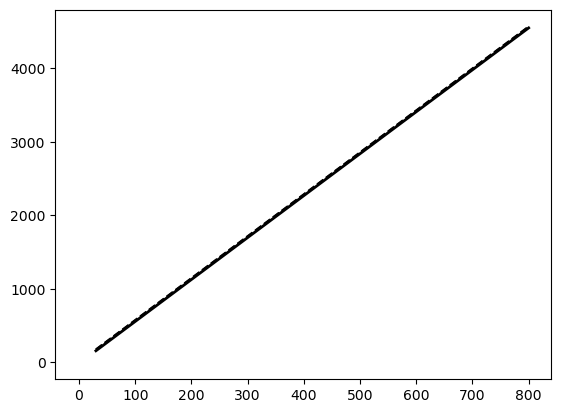

In [39]:
# Plot the separating hyperplane

w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 800)
yy = a * xx - (svm.intercept_[0]) / w[1]
plt.plot(xx, yy, linewidth=2, color='black')

# Plot the parallels to the hyperplane that pass through the support vectors
b = svm.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
           s=80, facecolors='none')

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Model evaluation: accuracy = (number of correct predictions) / (total number of predictions)
print("Accuracy:",accuracy_score(y_test, prediction))

# Model Precision:  number of true positives divided by the total number of positive predictions
print("Precision:",precision_score(y_test, prediction))

# Model Recall: True positive rate
print("Recall:",recall_score(y_test, prediction))

Accuracy: 0.8434782608695652
Precision: 0.8571428571428571
Recall: 0.8702290076335878


## Logistic Model

In [41]:
# import logistic modelling code
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(max_iter=1000)

In [42]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
clf.predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [69]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, clf)))

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got LogisticRegression(max_iter=1000, random_state=0) instead.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:


# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

## XGBoosting

In [62]:
# XGBoosting
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
import xgboost as xgb
from xgboost import XGBClassifier
classifier = xgb.XGBClassifier(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
folds = 3
param_comb = 5

random_search = RandomizedSearchCV(classifier,
                                   param_distributions=param_grid,
                                   n_iter=param_comb,
                                   scoring='roc_auc',
                                   n_jobs=4,
                                   verbose=3,
                                   random_state=1001
                                  )

# Here we go
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='rmsle',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=N...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.015],
                                        'max_depth': [4, 5],
                                        'n_estimators': [500, 600, 700]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [64]:
print("The best hyperparameters are ", random_search.best_params_)

The best hyperparameters are  {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.01}


In [65]:
# put code here
from xgboost import XGBClassifier

model = XGBClassifier()
# create an xgboost regression model
model = XGBClassifier(n_estimators=600, max_depth=4, eta=0.01)

# fit model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
# cols_when_model_builds = model.get_booster().feature_names
# X_test = X_test[cols_when_model_builds]


y_predict = model.predict(X_test)
model.fit(X_test, y_predict)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

In [67]:
# Accuracy vs Precision
from sklearn.metrics import mean_squared_log_error
print("The score is %.5f" % RMSLE )

The score is 0.27423


# Model Findings

# Conclusion